Import what will be needed for the exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import metrics
from tensorflow.keras.models import load_model

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
#load the dataset
customer = pd.read_csv('../dataset/customer_classification_clean_data.csv')

In [4]:
customer

,age,current_balance,conn_tr,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,has_tv_package_yes,last_contact_cell,last_contact_cellular,last_contact_telephone,last_contact_unknown,outcome_previous_campaign_failure,outcome_previous_campaign_other,outcome_previous_campaign_success,outcome_previous_campaign_unknown,new_contract_this_campaign
0,39,-1.90,4,8,-1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
1,53,3.62,1,2,-1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,79,27.87,3,1,377,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,43,5.50,3,2,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,35,3.44,2,16,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,31,4.99,3,2,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
50658,31,6.65,1,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
50659,60,4.39,4,1,321,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
50660,32,30.36,5,5,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
customer.shape

(50662, 41)

Data Preparation

In [6]:
#save the dataset as an array of numerical values
customer_df = customer.values

In [7]:
customer_df

array([[39.  , -1.9 ,  4.  , ...,  0.  ,  1.  ,  1.  ],
       [53.  ,  3.62,  1.  , ...,  0.  ,  1.  ,  1.  ],
       [79.  , 27.87,  3.  , ...,  1.  ,  0.  ,  1.  ],
       ...,
       [60.  ,  4.39,  4.  , ...,  0.  ,  0.  ,  1.  ],
       [32.  , 30.36,  5.  , ...,  0.  ,  1.  ,  0.  ],
       [31.  ,  1.19,  1.  , ...,  0.  ,  1.  ,  0.  ]])

In [8]:
#Splitting the dataset into categories. The X category (containing 12 columns) will be used to predict the y category (containing 1 column)
X = customer_df[:,0:40]

In [9]:
y = customer_df[:,40]

In [10]:
y

array([1., 1., 1., ..., 1., 0., 0.])

In [11]:
X

array([[39.  , -1.9 ,  4.  , ...,  0.  ,  0.  ,  1.  ],
       [53.  ,  3.62,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [79.  , 27.87,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [60.  ,  4.39,  4.  , ...,  0.  ,  0.  ,  0.  ],
       [32.  , 30.36,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [31.  ,  1.19,  1.  , ...,  0.  ,  0.  ,  1.  ]])

In [12]:
#Scaling the dataset's X category columns to a smaller-range numerical values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#Split the dataset into training, testing and validation sets. 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(35463, 40) (7599, 40) (7600, 40) (35463,) (7599,) (7600,)


Building the Artificial Neural Network Model(s)

In [18]:
#THE ARCHITECTURE
#Defining A two-layer Neural Network each with 32 Neurons using the Rectified Linear Activation Function (ReLu)
#Pass onto the model the 12 columns of the X input category. 
customer_model = Sequential([
    Dense(32, activation='relu', input_shape=(40,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
customer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                1312      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [19]:
#OPTIMIZATION ALGORITHM FOR THE MODEL, MODEL LOSS FUNCTION, AND LOSS FUNCTION TRACKING METRIC
customer_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
predictions = customer_model.predict(X_val)

In [20]:
#TRAINING THE MODEL
hist = customer_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
1109/1109 [==============================] - 13s 8ms/step - loss: 0.4701 - accuracy: 0.8035 - val_loss: 0.4447 - val_accuracy: 0.8101
Epoch 2/100
1109/1109 [==============================] - 5s 5ms/step - loss: 0.4350 - accuracy: 0.8233 - val_loss: 0.4323 - val_accuracy: 0.8247
Epoch 3/100
1109/1109 [==============================] - 5s 4ms/step - loss: 0.4275 - accuracy: 0.8307 - val_loss: 0.4281 - val_accuracy: 0.8262
Epoch 4/100
1109/1109 [==============================] - 6s 5ms/step - loss: 0.4247 - accuracy: 0.8317 - val_loss: 0.4270 - val_accuracy: 0.8258
Epoch 5/100
1109/1109 [==============================] - 5s 4ms/step - loss: 0.4234 - accuracy: 0.8326 - val_loss: 0.4258 - val_accuracy: 0.8268
Epoch 6/100
1109/1109 [==============================] - 5s 5ms/step - loss: 0.4225 - accuracy: 0.8324 - val_loss: 0.4256 - val_accuracy: 0.8262
Epoch 7/100
1109/1109 [==============================] - 7s 6ms/step - loss: 0.4219 - accuracy: 0.8319 - val_loss: 0.4249 - val_a

In [21]:
#EVALUATING THE MODEL'S PERFORMANCE
customer_model.evaluate(X_test, Y_test)[1]

238/238 [==============================] - 1s 5ms/step - loss: 0.4238 - accuracy: 0.8278


0.8277631402015686

In [22]:
mean_absolute_error(Y_val, predictions)

0.5039952403699933

In [23]:
mean_squared_error(Y_val, predictions)
math.sqrt(mean_squared_error(Y_val, predictions))

0.5051620344119174

In [24]:
np.mean(Y_val)

0.19857876036320568

In [25]:
np.mean(predictions)

0.5113844

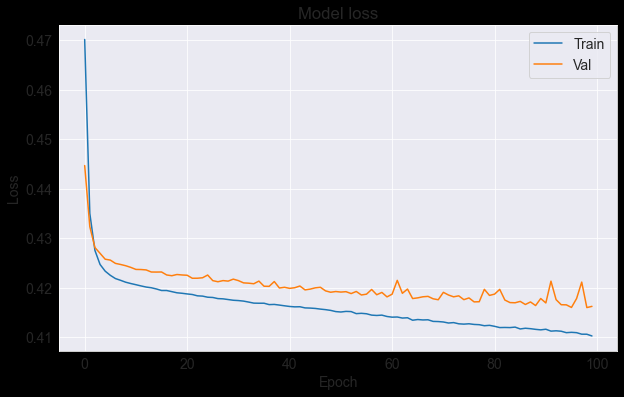

In [26]:
#VISUALIZATION OF THE TRAINING LOSS AND THE VALIDATION LOSS FOR THE MODEL
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

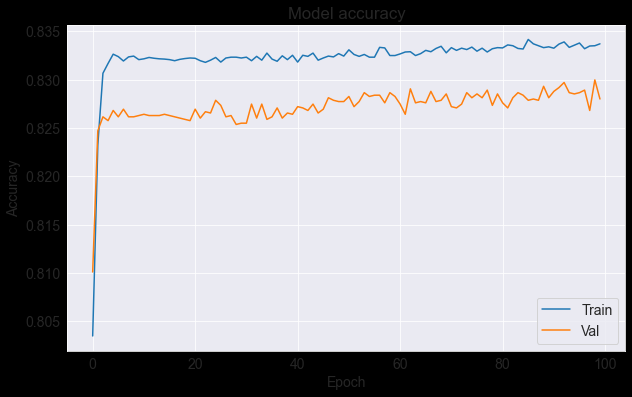

In [27]:
#VISUALIZATION OF THE TRAINING ACCURACY AND VALIDATION ACCURACY
#FROM THIS GRAPH, THE SIGNIFICANT VARIATION BETWEEN THE TRAINING ACCURACY AND THE VALIDATION ACCURACY SIGNIFIES THAT THE MODEL IS SOMEWHAT OVERFITTING THE DATA. 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
#DEFINING A SECOND MODEL, THAT USES REGULARIZATION TO MINIMIZE OVERFITTING AND IMPROVE THE GENERAL ACCURACY. 
#THE ARCHITECTURE
customer_model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(40,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
customer_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              41000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)             

In [31]:
customer_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
              
hist_2 = customer_model_2.fit(X_train, Y_train, batch_size=100, epochs=30, validation_data=(X_val, Y_val))
predictions = customer_model_2.predict(X_val)

Epoch 1/30
355/355 [==============================] - 86s 226ms/step - loss: 1.8968 - accuracy: 0.8044 - val_loss: 0.4998 - val_accuracy: 0.8014
Epoch 2/30
355/355 [==============================] - 75s 210ms/step - loss: 0.5008 - accuracy: 0.8056 - val_loss: 0.4984 - val_accuracy: 0.8014
Epoch 3/30
355/355 [==============================] - 81s 229ms/step - loss: 0.5007 - accuracy: 0.8056 - val_loss: 0.4991 - val_accuracy: 0.8014
Epoch 4/30
355/355 [==============================] - 74s 209ms/step - loss: 0.4996 - accuracy: 0.8056 - val_loss: 0.4980 - val_accuracy: 0.8014
Epoch 5/30
355/355 [==============================] - 67s 187ms/step - loss: 0.4991 - accuracy: 0.8056 - val_loss: 0.4989 - val_accuracy: 0.8014
Epoch 6/30
355/355 [==============================] - 65s 183ms/step - loss: 0.4984 - accuracy: 0.8056 - val_loss: 0.4980 - val_accuracy: 0.8014
Epoch 7/30
355/355 [==============================] - 72s 204ms/step - loss: 0.5013 - accuracy: 0.8056 - val_loss: 0.4987 - val_ac

In [32]:
#MODEL EVALUATION
customer_model_2.evaluate(X_test, Y_test)[1]

238/238 [==============================] - 8s 33ms/step - loss: 0.4953 - accuracy: 0.8030 1s - loss: 0.4907 - accuracy - ETA: 0s -


0.8030263185501099

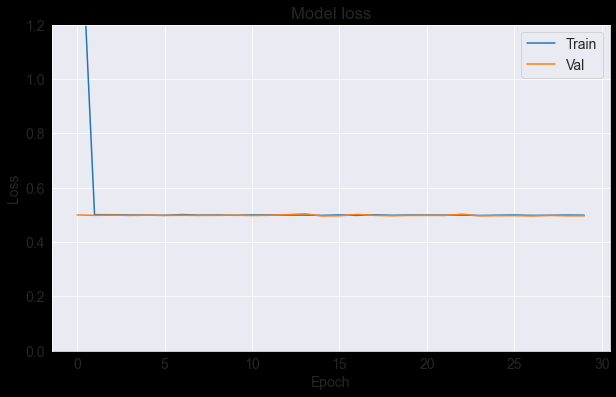

In [33]:
#VISUALIZATION OF THE TRAINING LOSS AND THE VALIDATION LOSS FOR THE MODEL
#CLEARLY, THE MODEL DOES SEEM TO PERFORM BETTER
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

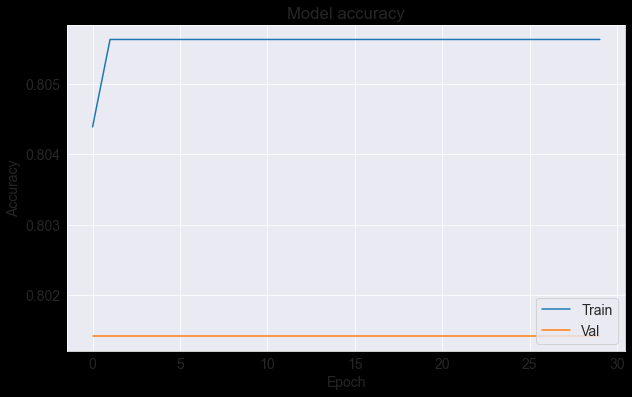

In [34]:
#VISUALIZATION OF THE TRAINING ACCURACY AND THE VALIDATION ACCURACY
#ALTHOUGH THE MODEL STILL SEEMS TO OVERFIT THE DATA, THERE IS A SIGNIFICANT IMPROVEMENT WHEN COMPARED TO THE FIRST MODEL
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [35]:
#THE MODEL ALSO REGISTERS A LOWER MEAN SQUARED ERROR COMPARED TO THE FIRST MODEL. 
#THE M.A.E IS BIGGER COMPARED TO THE 20% MAE REGISTERED BY THE SVM MODEL
mean_absolute_error(Y_val, predictions)

0.2912728505897622

In [36]:
mean_squared_error(Y_val, predictions)
math.sqrt(mean_squared_error(Y_val, predictions))

0.3761598555935236

In [37]:
m = metrics.Precision()
m.update_state(Y_val, predictions)
m.result().numpy()

0.0

In [38]:
m_1 = metrics.Recall()
m_1.update_state(Y_val, predictions)
m_1.result().numpy()

0.0

In [39]:
customer_model_2.save('loan_determinant_ANN', save_format='tf')

INFO:tensorflow:Assets written to: loan_determinant_ANN\assets
